> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

% matplotlib inline

In [29]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==1.1.5

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

# Data selection

For this project I will use data from Gapminder (https://www.gapminder.org/data/). For my analysis, I have specifically selected the following indicators:
- Income per person (GDP/capita, PPP$ inflation-adjusted): Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPPbased on 2011 ICP).
- Life expectancy (years): The average number of years a newborn would live if current mortality patterns were to stay the same.
- Life expectancy, male: Life expectancy at birth for males
- Life expectancy, female: Life expectancy at birth for females

# Range of years and countries of interest

Gapminder incorporates data from the 1950s, with projections for up 2099 for about 200 countries (some countries are excluded from certain indicators). This is a huge amount of data to analyse. 

I therefore chose to limit the range of data for my analysis to historic data for the past five full decades (i.e. 1971 to 2020), as well as consider only countries in my current geography, the Southern African Development Community (SADC). I believe this focus on a specific data set of interest will allow me to draw more impactful insights than if I had gone with a general view of the entire data set.

SADC is a grouping of 16 countries in the southern most part of Africa.

In [30]:
#Defining the columns that I want to use across all the datasets
select_cols = ['country', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [31]:
#Defining the countries that I want to use across all the datasets
sadc_countries = ['Angola', 'Botswana', 'Comoros', 'Congo, Dem. Rep.', 'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'Seychelles', 'South Africa', 'Tanzania', 'Zambia', 'Zimbabwe']

In [32]:
#Creating a list of only the year columns
years = ['1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020']

## Loading and subsetting the data

This section loads the data from the forur dataframes listed above by reading from the csv files downloaded from the Gapmider website.

The loaded data is then subset for the years and countries of interest.

Finally a quick look at the data to confirm that the loading and subseting were successful will be done by checking the number of rows and columns (shape) for each dataframe as well as showing the first few rows of each dataframe.

In [33]:
#Loading and delimiting the Income per person (GDP/capita, PPP$ inflation-adjusted) data
income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_df = income_df[select_cols]
income_df = income_df[income_df.country.isin(sadc_countries)].reset_index(drop=True)
print(income_df.shape)
income_df.head()

(16, 51)


,country,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,3200,3170,3320,3170,1990,1770,1740,1780,1780,...,7680,8040,8140,8240,8040,7570,7310,6930,6670,6120
1,Botswana,1700,2080,2440,2570,2680,2860,3040,3260,3580,...,13.7k,14.2k,15.6k,16k,14.9k,15.7k,15.9k,16.2k,16.3k,14.6k
2,"Congo, Dem. Rep.",2760,2700,2850,2860,2650,2440,2400,2210,2160,...,895,927,972,1030,1070,1060,1060,1090,1100,1080
3,Comoros,1890,1920,2030,2070,2180,2160,2100,2140,2290,...,2930,2950,3010,3000,2960,2990,3030,3070,3060,2970
4,Lesotho,693,808,997,1030,924,1050,1200,1400,1210,...,2450,2590,2610,2640,2700,2780,2670,2620,2580,2410


In [34]:
#Loading and delimiting the Life expectancy (years) data
life_expectancy_all_df = pd.read_csv('life_expectancy_years.csv')
life_expectancy_all_df = life_expectancy_all_df[select_cols]
life_expectancy_all_df = life_expectancy_all_df[life_expectancy_all_df.country.isin(sadc_countries)].reset_index(drop=True)
print(life_expectancy_all_df.shape)
life_expectancy_all_df.head()

(16, 51)


,country,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,46.8,47.0,47.2,47.4,47.5,47.5,47.7,47.8,48.0,...,60.8,61.4,62.1,63.0,63.5,63.9,64.2,64.6,65.1,65.2
1,Botswana,57.0,57.5,58.1,58.6,59.1,59.6,59.9,60.3,60.6,...,57.8,58.6,59.4,60.1,60.6,61.2,61.5,61.8,62.3,61.6
2,"Congo, Dem. Rep.",49.9,50.0,50.3,50.7,50.9,51.1,51.3,51.5,51.8,...,59.4,60.1,60.9,61.8,62.6,63.3,63.9,64.7,65.0,65.2
3,Comoros,51.7,52.0,52.3,52.5,52.9,53.2,53.5,53.8,54.1,...,65.7,66.3,66.7,67.2,67.5,67.9,68.2,68.5,68.7,68.8
4,Lesotho,54.7,55.0,55.4,55.8,56.2,56.6,57.1,57.7,58.1,...,48.2,47.9,47.9,47.9,48.5,49.6,50.8,51.4,51.8,52.0


In [35]:
#Loading and delimiting the Life expectancy, male data
life_expectancy_male_df = pd.read_csv('life_expectancy_male.csv')
life_expectancy_male_df = life_expectancy_male_df[select_cols]
life_expectancy_male_df = life_expectancy_male_df[life_expectancy_male_df.country.isin(sadc_countries)].reset_index(drop=True)
print(life_expectancy_male_df.shape)
life_expectancy_male_df.head()

(16, 51)


,country,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,40.0,40.4,40.7,41.1,41.4,41.7,42.0,42.3,42.5,...,53.8,54.7,55.4,56.1,56.7,57.2,57.7,58.1,58.4,58.7
1,Botswana,51.2,51.7,52.2,52.8,53.3,53.9,54.4,54.9,55.4,...,59.4,60.9,62.3,63.5,64.5,65.2,65.8,66.2,66.5,66.7
2,"Congo, Dem. Rep.",42.8,43.1,43.4,43.6,43.8,44.0,44.2,44.4,44.6,...,56.0,56.5,56.9,57.4,57.8,58.2,58.5,58.9,59.1,59.4
3,Comoros,44.5,44.9,45.3,45.8,46.2,46.7,47.2,47.8,48.4,...,60.6,61.0,61.3,61.6,61.8,62.0,62.2,62.4,62.6,62.8
4,Lesotho,46.1,46.7,47.2,47.8,48.4,49.1,49.8,50.5,51.1,...,43.4,44.5,45.7,46.9,48.0,49.0,49.8,50.6,51.2,51.7


In [36]:
#Loading and delimiting the Life expectancy, female data
life_expectancy_female_df = pd.read_csv('life_expectancy_female.csv')
life_expectancy_female_df = life_expectancy_female_df[select_cols]
life_expectancy_female_df = life_expectancy_female_df[life_expectancy_female_df.country.isin(sadc_countries)].reset_index(drop=True)
print(life_expectancy_female_df.shape)
life_expectancy_female_df.head()

(16, 51)


,country,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,42.7,43.1,43.4,43.8,44.2,44.5,44.9,45.2,45.5,...,59.1,60.0,60.8,61.6,62.2,62.8,63.3,63.7,64.0,64.4
1,Botswana,57.5,58.0,58.6,59.1,59.7,60.3,60.8,61.4,61.9,...,64.3,66.0,67.5,68.9,70.0,70.9,71.6,72.0,72.4,72.6
2,"Congo, Dem. Rep.",45.6,45.9,46.2,46.4,46.6,46.8,47.0,47.2,47.5,...,58.9,59.3,59.8,60.3,60.7,61.1,61.5,61.9,62.2,62.5
3,Comoros,47.8,48.3,48.7,49.2,49.6,50.1,50.6,51.1,51.7,...,63.9,64.3,64.6,64.9,65.2,65.4,65.7,65.9,66.1,66.3
4,Lesotho,55.0,55.5,56.1,56.6,57.3,57.9,58.6,59.3,59.9,...,49.3,50.5,51.8,53.1,54.3,55.3,56.2,57.0,57.6,58.1


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

The exploratory data analysis for each dataframe is a repetitive process with the following steps:
1. Checking for null values
2. Checking the data types for each column in the dataframe
3. A look at the descriptive statistics of the numerical columns of the dataframe
4. Plotting a line graph of the combined averages (mean) of all the SADC countries over the time series
5. Plotting a box plot for all the SADC countries over the time series. The box plot shows additional information on how skewed the data is for each particular year, as well as expose any outliers.
6. Plot a histograms for all the SADC countries over the time series. Histograms reveal additional perspectives on the data as they show the skew of the data as well as the relative size of each grouping (i.e., number of countries in each grouping)

### Income_df

**Initial data cleaning**: Because the income_df data used 'k' to denote thousands, i need to do some initial data cleaning to replace the 'k' with numeric thousands (000) so that I can explore the income_data data as numberic

In [37]:
#Creating a list of only the year columns
years = ['1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [38]:
#replacing 'k' with numeric 000's
replace_k = income_df[years].replace({'k': 'e+03'}, regex=True).astype(float)

In [39]:
#Updating the income_df dataframe with the numeric years columns
income_df.drop(years, axis=1, inplace=True)
income_df = pd.concat([income_df, replace_k], axis=1)

In [40]:
#Checking for null values in the income_df - there are none (0)
(income_df.isnull().sum() > 0).sum()

0

In [41]:
#Confirming the data types of the income_df columns
income_df.dtypes

country     object
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
dtype: object

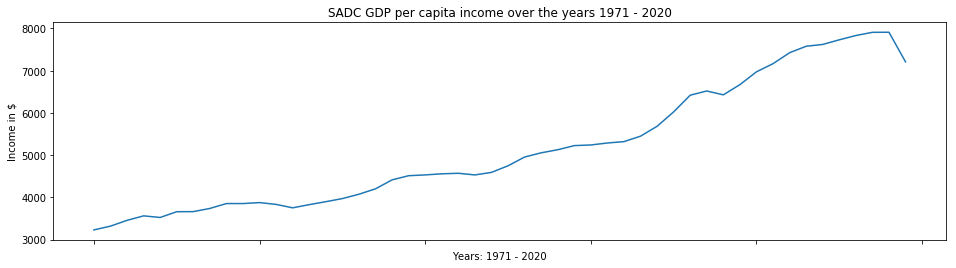

In [42]:
#Plotting the average GDP per capita income for all SADC countries 
plt.figure(figsize=(16,4))
income_df.mean(axis=0).plot();
plt.title("SADC GDP per capita income over the years 1971 - 2020");
plt.ylabel("Income in $");
plt.xlabel("Years: 1971 - 2020");

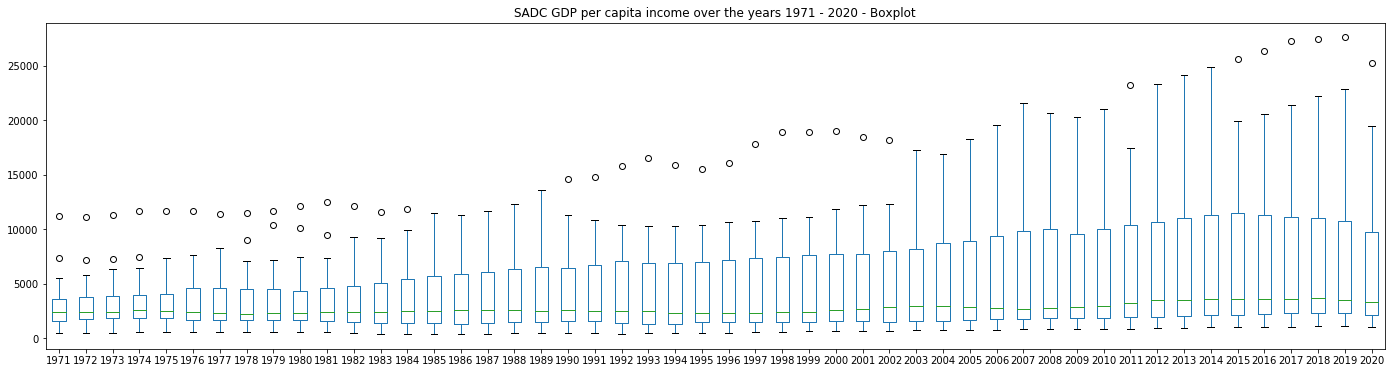

In [43]:
#A look at the boxplot version of the average GDP per capita income for all SADC countries
#This views shows the skew of the data as well as any outliers
income_df.plot(figsize=(24,6), kind='box');
plt.title("SADC GDP per capita income over the years 1971 - 2020 - Boxplot");

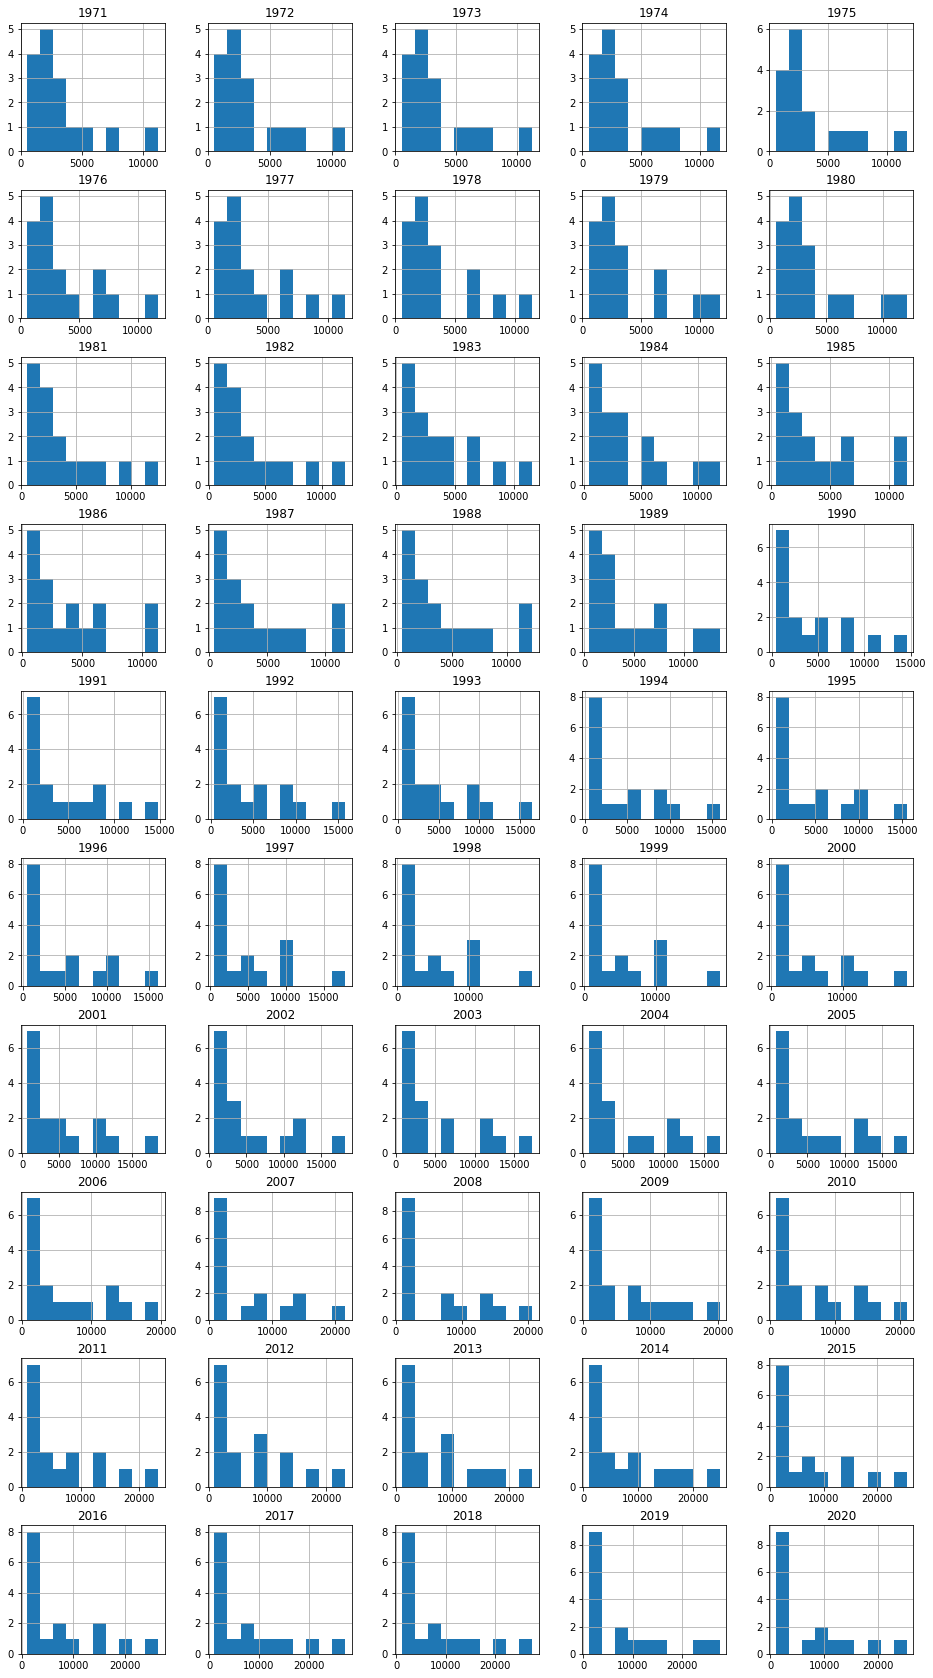

In [44]:
#A look at the histogram version of the average GDP per capita income for all SADC countries
#this view shows the skew of the data as well as the relative size of each grouping (i.e., number of countries in each grouping)
fig, ax = plt.subplots(10, 5, figsize=(16, 30))
income_df.hist(ax=ax);

In [45]:
#A look at the descriptive statistics of the dataset
income_df.describe()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.00000
mean,3230.437500,3319.875000,3456.812500,3563.25000,3525.187500,3661.562500,3663.68750,3738.687500,3854.500000,3854.437500,...,6973.437500,7166.687500,7425.750000,7578.750000,7621.875000,7731.250000,7833.12500,7908.750000,7910.625000,7208.75000
std,2809.153181,2772.289592,2837.811251,2929.69276,2949.927981,3077.446842,3081.62515,3172.865933,3374.146213,3369.555717,...,6800.986869,6886.139574,7197.238243,7387.571432,7494.524418,7732.834646,7968.68347,8103.400829,8205.719525,7292.43615
min,507.000000,520.000000,532.000000,552.00000,549.000000,565.000000,549.00000,539.000000,542.000000,551.000000,...,895.000000,927.000000,972.000000,1030.000000,1070.000000,1060.000000,1060.00000,1090.000000,1100.000000,1080.00000
25%,1577.500000,1755.000000,1840.000000,1872.50000,1822.500000,1675.000000,1655.00000,1687.500000,1685.000000,1682.500000,...,1960.000000,1982.500000,2040.000000,2102.500000,2150.000000,2222.500000,2292.50000,2340.000000,2340.000000,2185.00000
50%,2395.000000,2445.000000,2405.000000,2645.00000,2515.000000,2460.000000,2360.00000,2250.000000,2305.000000,2360.000000,...,3200.000000,3510.000000,3540.000000,3575.000000,3575.000000,3575.000000,3645.00000,3720.000000,3550.000000,3320.00000
75%,3590.000000,3747.500000,3917.500000,4020.00000,4055.000000,4592.500000,4595.00000,4562.500000,4530.000000,4385.000000,...,10422.500000,10697.500000,11017.500000,11300.000000,11525.000000,11350.000000,11125.00000,11050.000000,10782.500000,9765.00000
max,11200.000000,11100.000000,11300.000000,11700.00000,11700.000000,11700.000000,11400.00000,11500.000000,11700.000000,12100.000000,...,23200.000000,23300.000000,24200.000000,24900.000000,25600.000000,26400.000000,27300.00000,27500.000000,27600.000000,25300.00000


### life_expectancy_all_df

In [46]:
#Checking the number of null values
(life_expectancy_all_df.isnull().sum() > 0).sum()

0

In [47]:
#Confirming the data types of each column in the dataframe
life_expectancy_all_df.dtypes

country     object
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
dtype: object

In [48]:
#A look at the descriptive statistics of the dataset
life_expectancy_all_df.describe()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,53.731250,54.125000,54.543750,55.018750,55.350000,55.718750,56.000000,56.293750,56.631250,57.112500,...,59.881250,60.600000,61.300000,61.87500,62.406250,62.918750,63.431250,63.975000,64.412500,64.343750
std,6.257019,6.188538,6.126116,6.177833,6.017641,6.064456,6.005442,6.101417,6.069675,6.166022,...,7.185932,7.063427,6.954519,6.75707,6.518023,6.204001,5.943144,5.780715,5.697002,5.735267
min,42.700000,43.500000,44.200000,44.900000,45.500000,46.200000,46.800000,47.500000,48.000000,48.100000,...,48.200000,47.900000,47.900000,47.90000,48.500000,49.600000,50.800000,51.400000,51.800000,52.000000
25%,49.700000,49.950000,50.600000,51.225000,51.725000,52.225000,52.950000,53.225000,53.525000,53.900000,...,56.725000,57.875000,58.850000,59.57500,60.100000,60.700000,61.100000,61.500000,61.975000,61.375000
50%,52.950000,53.450000,53.900000,54.300000,54.800000,55.300000,55.650000,55.900000,56.200000,56.450000,...,59.050000,60.100000,61.100000,61.80000,62.450000,63.000000,63.650000,64.500000,65.050000,65.000000
75%,57.275000,57.700000,58.175000,58.600000,58.875000,58.925000,58.850000,59.100000,59.150000,59.725000,...,62.150000,62.975000,63.550000,63.97500,64.425000,64.750000,65.100000,65.500000,65.925000,66.025000
max,66.400000,67.200000,67.800000,68.300000,68.900000,69.400000,69.800000,70.300000,70.800000,71.100000,...,74.600000,74.700000,75.100000,75.00000,75.200000,75.200000,75.300000,75.300000,75.500000,75.500000


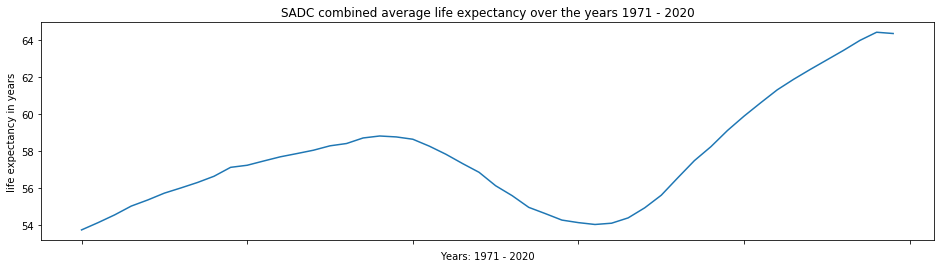

In [49]:
#Plotting the average combined life expectancy for all SADC countries 
plt.figure(figsize=(16,4))
life_expectancy_all_df.mean(axis=0).plot();
plt.title("SADC combined average life expectancy over the years 1971 - 2020");
plt.ylabel("life expectancy in years");
plt.xlabel("Years: 1971 - 2020");

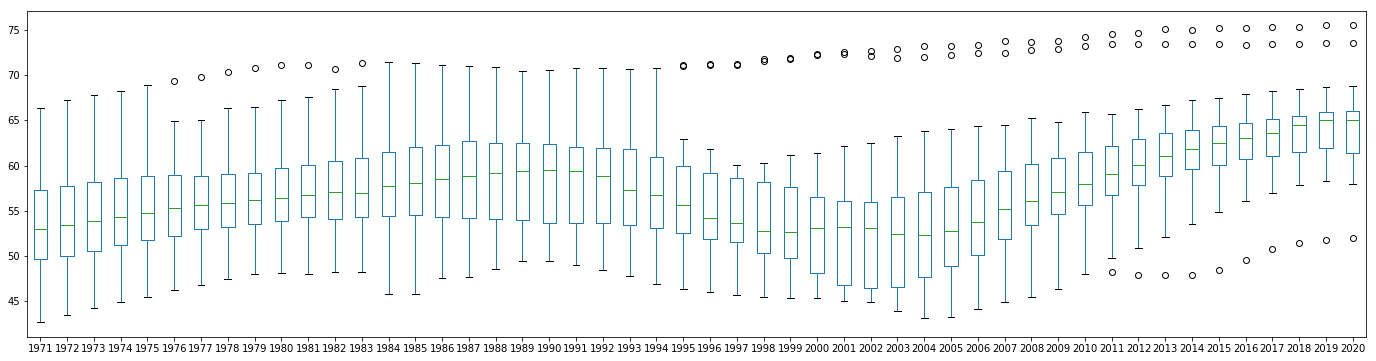

In [50]:
#A look at the boxplot version of the average combined life expectancy for all SADC countries
#This views shows the skew of the data as well as any outliers
life_expectancy_all_df.plot(figsize=(24,6), kind='box');

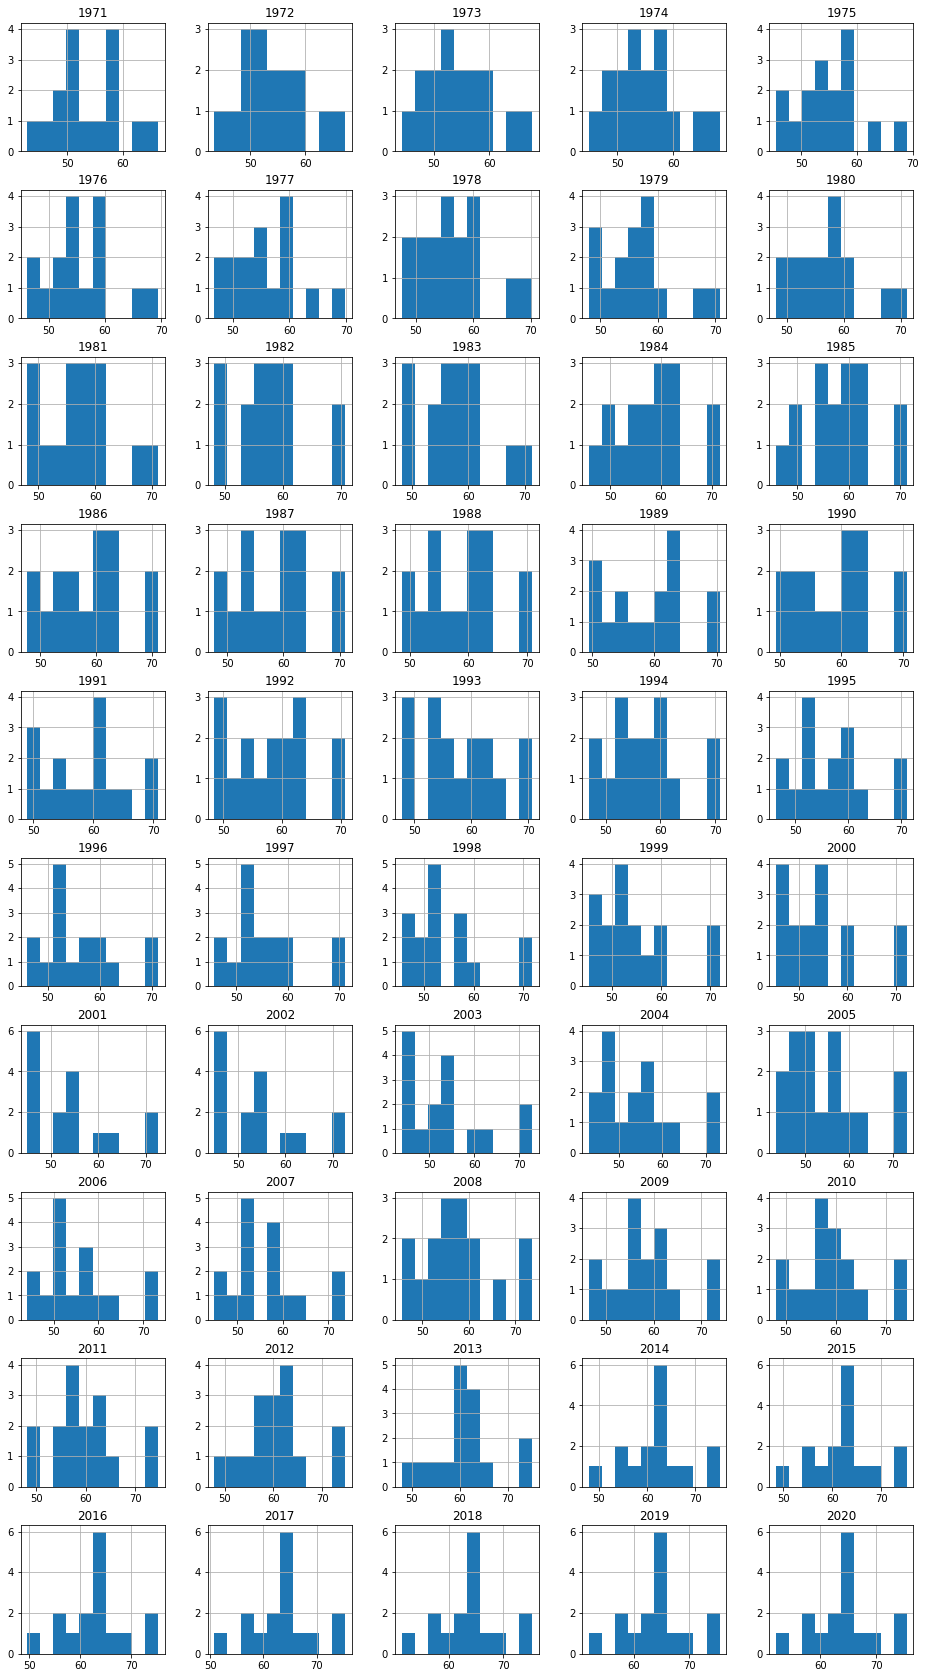

In [51]:
#A look at the histogram version of the average combined life expectancy for all SADC countries
#this view shows the skew of the data as well as the relative size of each grouping (i.e., number of countries in each grouping)
fig, ax = plt.subplots(10, 5, figsize=(16, 30))
life_expectancy_all_df.hist(ax=ax);

### life_expectancy_male_df

In [52]:
#Checking the number of null values
(life_expectancy_male_df.isnull().sum() > 0).sum()

0

In [53]:
#Confirming the data types of each column in the dataframe
life_expectancy_male_df.dtypes

country     object
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
dtype: object

In [54]:
#A look at the descriptive statistics of the dataset
life_expectancy_male_df.describe()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,48.275000,48.662500,49.07500,49.506250,49.893750,50.318750,50.73125,51.143750,51.525000,51.906250,...,56.325000,57.268750,58.162500,58.968750,59.693750,60.287500,60.80000,61.237500,61.581250,61.887500
std,6.942766,6.869437,6.83691,6.800732,6.787977,6.813537,6.84687,6.890764,6.953704,7.048638,...,7.241961,6.896929,6.545927,6.206311,5.910157,5.627536,5.42697,5.223776,5.102577,4.999983
min,39.900000,40.400000,40.70000,41.100000,41.400000,41.700000,42.00000,42.300000,42.400000,42.400000,...,43.400000,44.500000,45.700000,46.900000,48.000000,49.000000,49.80000,50.600000,51.200000,51.700000
25%,44.000000,44.375000,44.82500,45.250000,45.600000,45.950000,46.30000,46.650000,47.000000,47.300000,...,53.125000,54.325000,55.325000,56.475000,57.525000,57.950000,58.30000,58.700000,58.925000,59.225000
50%,46.500000,47.100000,47.75000,48.400000,49.050000,49.800000,50.35000,50.800000,51.200000,51.600000,...,55.900000,56.700000,57.600000,58.450000,59.150000,59.650000,60.20000,60.500000,60.750000,61.050000
75%,50.975000,51.475000,51.97500,52.575000,53.150000,53.750000,54.32500,54.825000,55.325000,55.900000,...,59.700000,60.925000,61.550000,62.075000,62.350000,62.600000,63.12500,63.675000,64.050000,64.425000
max,63.100000,63.500000,64.00000,64.400000,64.800000,65.300000,65.70000,66.100000,66.400000,66.700000,...,70.300000,70.500000,70.700000,70.900000,71.100000,71.200000,71.40000,71.500000,71.700000,71.800000


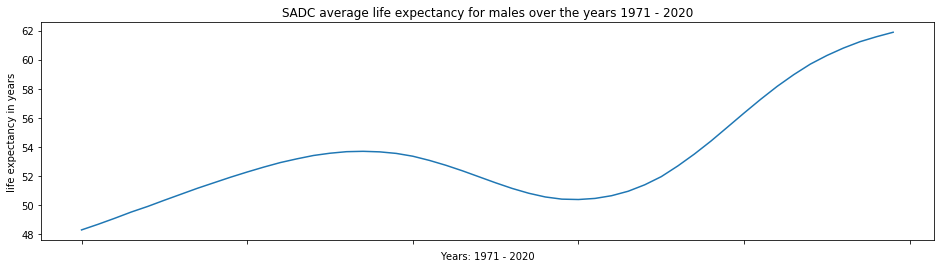

In [55]:
#Plotting the average male life expectancy for all SADC countries 
plt.figure(figsize=(16,4))
life_expectancy_male_df.mean(axis=0).plot();
plt.title("SADC average life expectancy for males over the years 1971 - 2020");
plt.ylabel("life expectancy in years");
plt.xlabel("Years: 1971 - 2020");

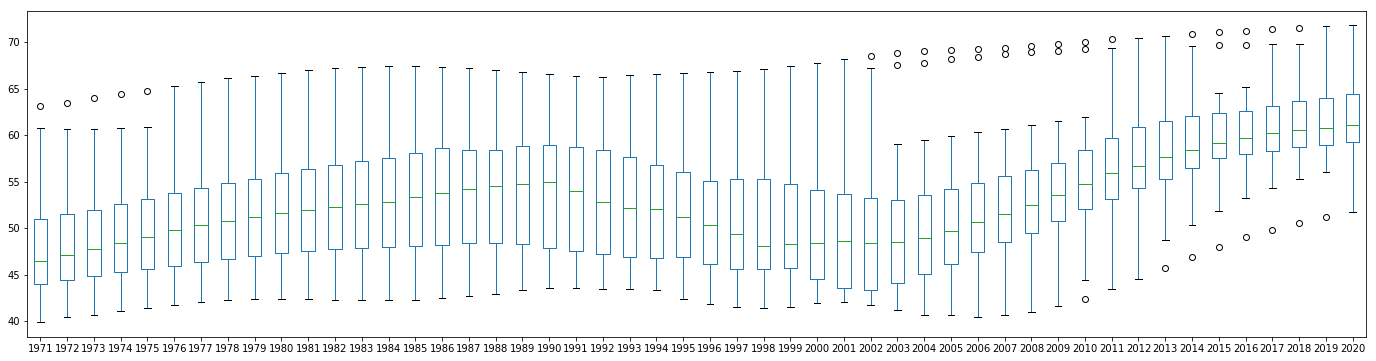

In [56]:
#A look at the boxplot version of the average male life expectancy for all SADC countries
#This views shows the skew of the data as well as any outliers
life_expectancy_male_df.plot(figsize=(24,6), kind='box');

### life_expectancy_female_df

In [57]:
#Checking the number of null values
(life_expectancy_female_df.isnull().sum() > 0).sum()

0

In [58]:
#Confirming the data types of each column in the dataframe
life_expectancy_female_df.dtypes

country     object
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
dtype: object

In [59]:
#A look at the descriptive statistics of the dataset
life_expectancy_female_df.describe()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,52.243750,52.687500,53.131250,53.581250,54.050000,54.500000,54.943750,55.362500,55.781250,56.168750,...,61.175000,62.262500,63.281250,64.218750,65.025000,65.706250,66.275000,66.731250,67.125000,67.456250
std,8.414271,8.408874,8.419083,8.459095,8.515946,8.577101,8.635583,8.696196,8.765023,8.802554,...,7.653801,7.245493,6.839709,6.464902,6.128458,5.861566,5.643935,5.434423,5.334854,5.232331
min,40.500000,41.100000,41.600000,42.100000,42.600000,43.100000,43.600000,44.100000,44.500000,44.600000,...,49.300000,50.500000,51.800000,53.100000,54.300000,55.300000,56.200000,57.000000,57.600000,58.100000
25%,46.050000,46.500000,46.950000,47.300000,47.725000,48.075000,48.425000,48.775000,49.150000,49.450000,...,58.050000,58.625000,59.450000,60.200000,60.925000,61.575000,62.650000,63.525000,63.925000,64.350000
50%,51.350000,51.900000,52.450000,53.000000,53.500000,54.050000,54.550000,54.950000,55.400000,55.800000,...,60.100000,61.650000,62.950000,64.100000,64.950000,65.400000,65.850000,66.300000,66.700000,67.050000
75%,56.150000,56.650000,57.250000,57.900000,58.475000,59.000000,59.450000,59.900000,60.325000,60.825000,...,64.000000,64.675000,65.000000,65.725000,66.350000,66.900000,67.300000,67.625000,67.950000,68.200000
max,70.600000,71.000000,71.300000,71.700000,72.100000,72.400000,72.700000,73.000000,73.300000,73.500000,...,77.300000,77.500000,77.800000,77.900000,78.100000,78.200000,78.300000,78.300000,78.500000,78.600000


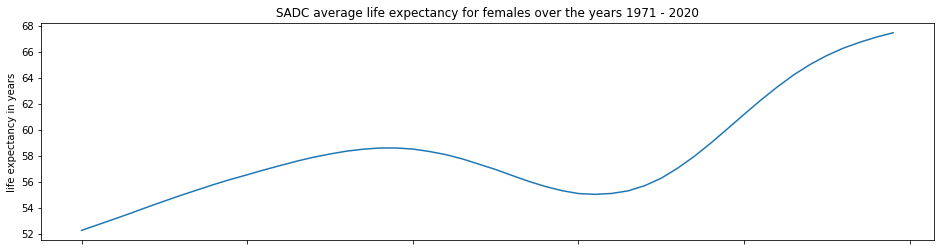

In [60]:
#Plotting the average female life expectancy for all SADC countries 
plt.figure(figsize=(16,4))
life_expectancy_female_df.mean(axis=0).plot();
plt.title("SADC average life expectancy for females over the years 1971 - 2020");
plt.ylabel("life expectancy in years");

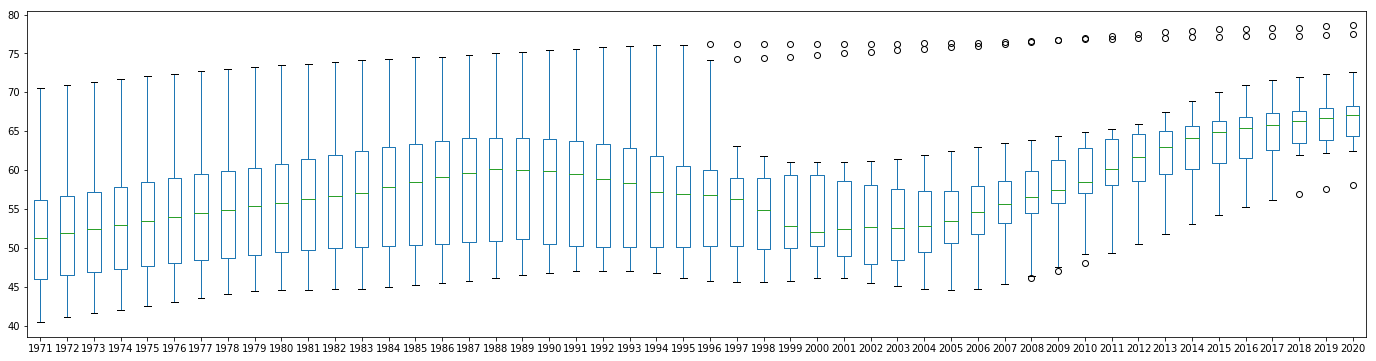

In [61]:
#A look at the boxplot version of the average female life expectancy for all SADC countries
#This views shows the skew of the data as well as any outliers
life_expectancy_female_df.plot(figsize=(24,6), kind='box');

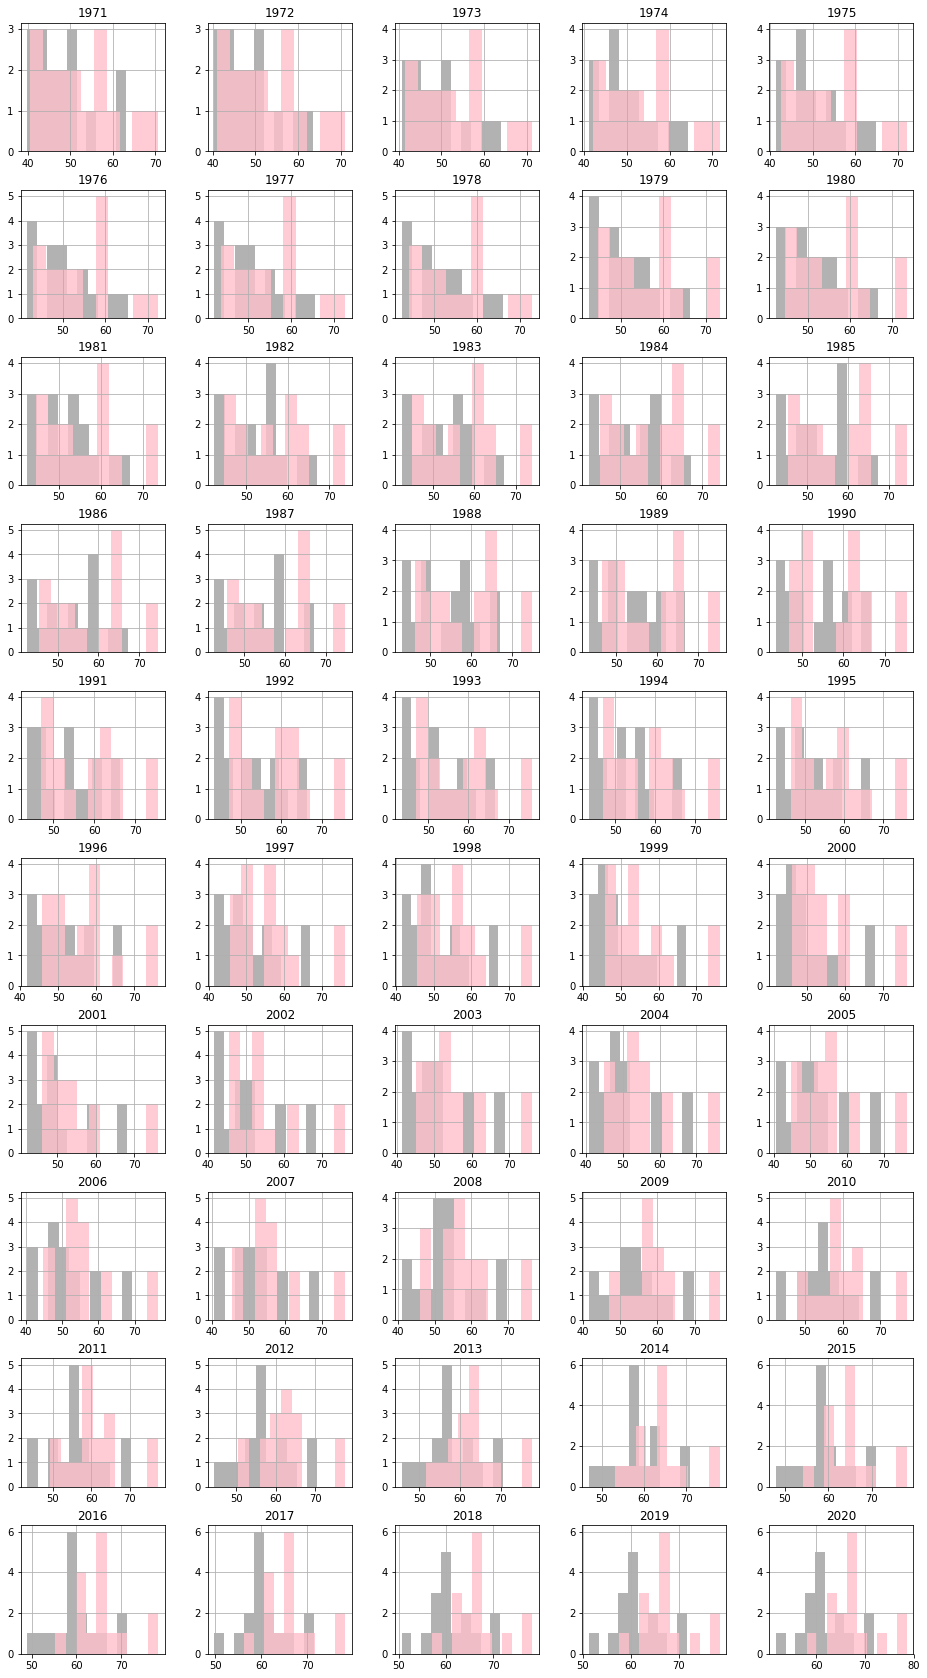

In [62]:
#Histograms with a comparison of the male and female average life expectancies for all SADC countries for each year
#PINK = Female life expectancy histograms
#Light black/Grey = Maleale life expectancy histograms
fig, ax = plt.subplots(10, 5, figsize=(16, 30))
life_expectancy_male_df.hist(ax=ax, alpha=0.3, color='black');
life_expectancy_female_df.hist(ax=ax, alpha=0.8, color='pink');

### Observations from the EDA

The EDA steps above revealed a few interesting things and informed the questions that I will answer in the next section. A few of the key observations are listed below:

- The data does not have any null values
- The data is relatively clean. The only cleaning I had to do was on the income_df where I replaced the 'k' for thousands with the numeric thousand (000's) to facilitate using the data in numeric operations.
- The trend in the average GDP per capita income indicates a general consistent rise between 1671 and 2020. However, there are two noticeable dips during the 2008/2009 and 2019/2020 periods.
- The trend in the life expectancy for the combined data set, males and females indicate a general rise for all three data sets for 4 out of the 5 decades under review (i.e., 1971 - 1980, 1981 - 1990, 2001 - 2010, 2011 - 2020). 
- The decade between the years 1991 and 2000 (into the early years of the 2000's) is the exception as it is characterised by falling life expectancy
- The life expectancy of females seems to be generally higher than that of males consistently throughout the review period.

## Questions

My analyisis will attempt to answer the following questions:
1. Is there a relationship between the average GDP per capita income and the life expectancies (combines, male and female) for the SADC region?
2. Is there a relationship between the GDP per capita income and the life expectancies (combines, male and female) for each of the 16 countries in the SADC region?
3. Is the trend where female life expectancy is higher than the male life expectancy consistent for ALL 16 SADC countries for each of the years under review (1971 to 2020)?
4. How do the figures for the GDP per capita income and the life expectancies for each of the countries compare to the average figures for the SADC region over the review period?

Each of these questions will be answered by means of visualisations in the section that follow.

#### Question 1: Is there a relationship between the average GDP per capita income and the life expectancies (combines, male and female) for the SADC region?

For this question, all the line graphs from the EDA section are collated in one visualisation so that comparisons can be made. The visualisation makes use of two different y-axes, one with the life expectancy in years and the other with the per capita income in dollars. 

The lines each depict the average (mean) values for each of the years for all the SADC countries combined. 

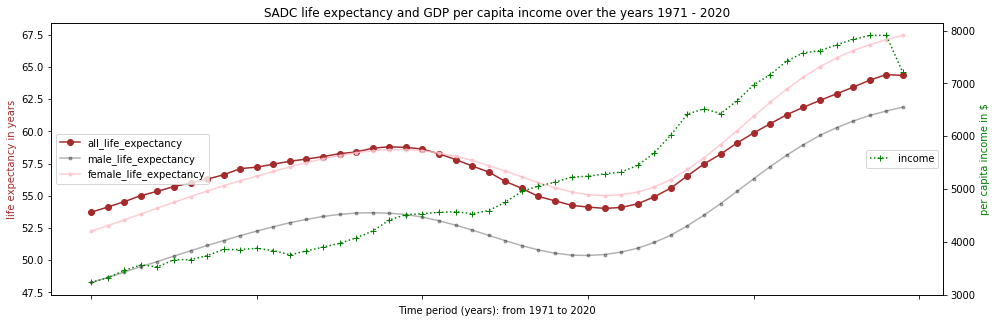

In [63]:
#Plot the average (mean) values for each of the years for all the SADC countries combined for each indicator.
fig,ax = plt.subplots(figsize=(16,5))
ax2=ax.twinx();
income_df.mean(axis=0).plot(ax=ax2, color='green', linestyle='dotted', label='income', marker = '+')
life_expectancy_all_df.mean(axis=0).plot(ax=ax, color='brown', label='all_life_expectancy', marker = 'o')
life_expectancy_male_df.mean(axis=0).plot(ax=ax, color='black', label='male_life_expectancy', marker = '.', alpha=0.3)
life_expectancy_female_df.mean(axis=0).plot(ax=ax, color='pink', label='female_life_expectancy', marker = '.', alpha=0.8)
plt.ylabel('per capita income in $', color='green')
ax.set_ylabel('life expectancy in years', color='brown')
ax.set_xlabel('Time period (years): from 1971 to 2020')
plt.title('SADC life expectancy and GDP per capita income over the years 1971 - 2020')
ax.legend(loc='center left');
ax2.legend(loc='center right');

The observations from the visual above seem to generally support the notion that as the average GDP per capita income for SADC rose during the years 1971 to 2020 it was accompanied by a rise in the life expectancies as well. This seems to be true for all the life expectancy indicators that we are tracking, i.e., combined, male and female expectancies.

One exception to this is during the years roughly in the 1991 to 2000 (and into the early 2000's) where per capita income is rising but the life expectancy indicators for that period are falling.

The other exception is around the years 2019/2020 where average per capita income dips sharply but the life expectancy indicators do not dip as sharply, the combined life expectancy figure does show signs of plateauing during this 2019/2020 but only so slightly.

On average, rising per capita income does seem to be related to the life expectancy indicators for the SADC countries. The few exceptions to this may be explained with other events that were happening in the macro-environment. This will be touched on in the conclusion section.

#### Question 2: Is there a relationship between the GDP per capita income and the life expectancies (combines, male and female) for each of the 16 countries in the SADC region?

This section follows the same approach as question 1, but this time I am looking at the indicators country by country (as opposed to taking the average for the entire SADC region)

In [64]:
#Defining a function that loops through the list of SADC countries and for each country produce a visualisation that
#plots the values for each indicator for the country.
def view_country(country):
    '''
    Takes a country name and shows the income and life expectancy graphs for the specified country
    country (string) - name of the country
    '''    
    
    fig,ax = plt.subplots(figsize=(16,5))
    ax2=ax.twinx();
    income_df[income_df.country == country].mean(axis=0).plot(ax=ax2, color='green', linestyle='dotted', label='income', marker = '+')
    life_expectancy_all_df[life_expectancy_all_df.country == country].mean(axis=0).plot(ax=ax, color='brown', label='all_life_expectancy', marker = 'o')
    life_expectancy_male_df[life_expectancy_male_df.country == country].mean(axis=0).plot(ax=ax, color='black', label='male_life_expectancy', marker = '.', alpha=0.3)
    life_expectancy_female_df[life_expectancy_female_df.country == country].mean(axis=0).plot(ax=ax, color='pink', label='female_life_expectancy', marker = '.', alpha=0.8)
    plt.ylabel('per capita income in $', color='green')
    ax.set_ylabel('life expectancy in years', color='brown')
    ax.set_xlabel('Time period (years): from 1971 to 2020')
    plt.title(country +' life expectancy and GDP per capita income over the years 1971 - 2020')
    ax.legend(loc='upper left');
    ax2.legend(loc='center right');

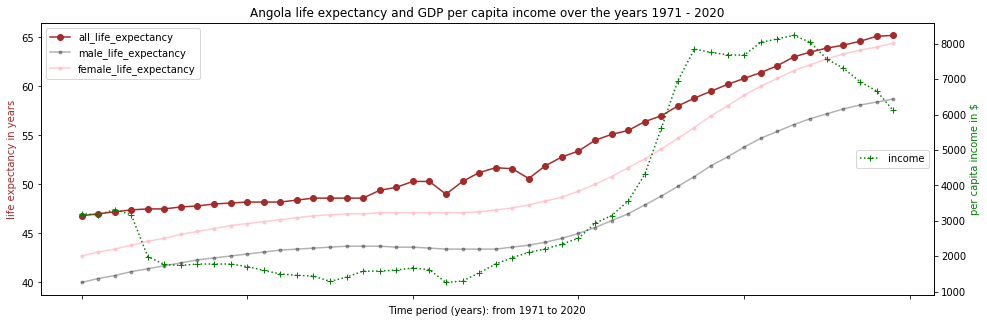

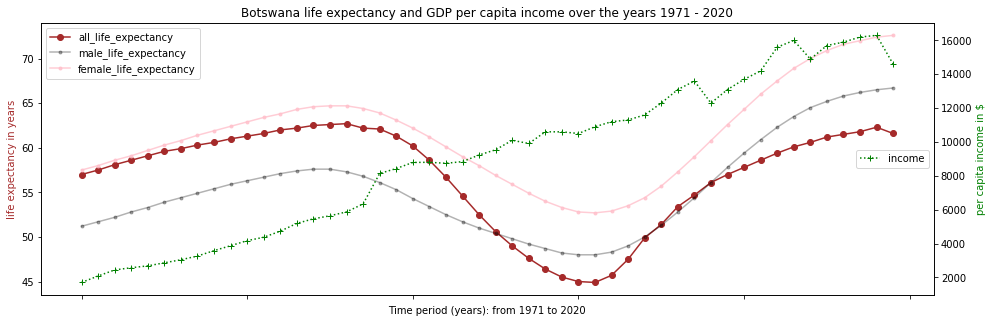

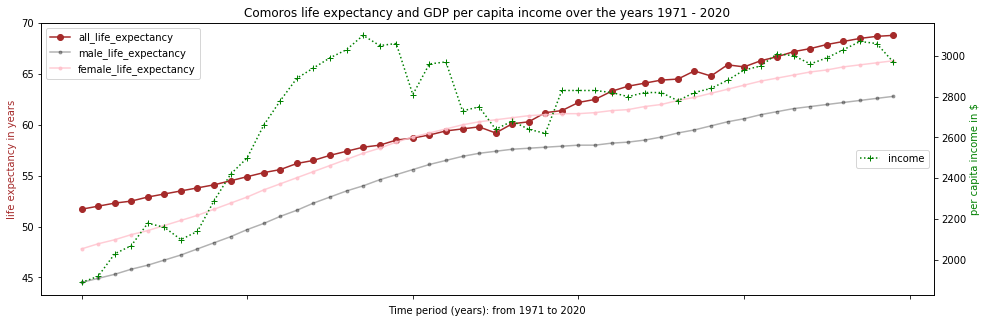

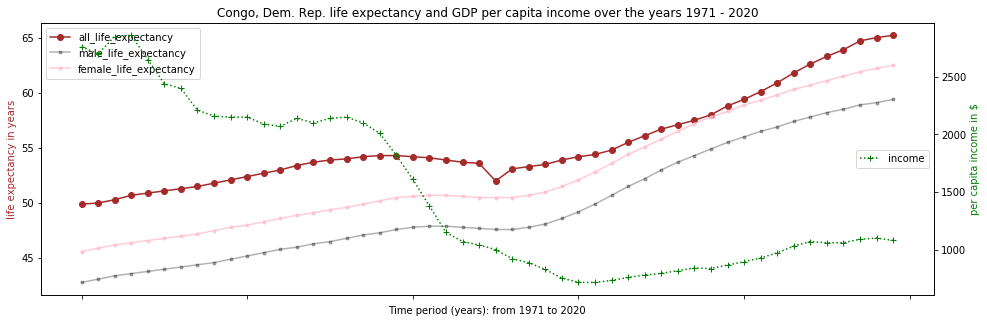

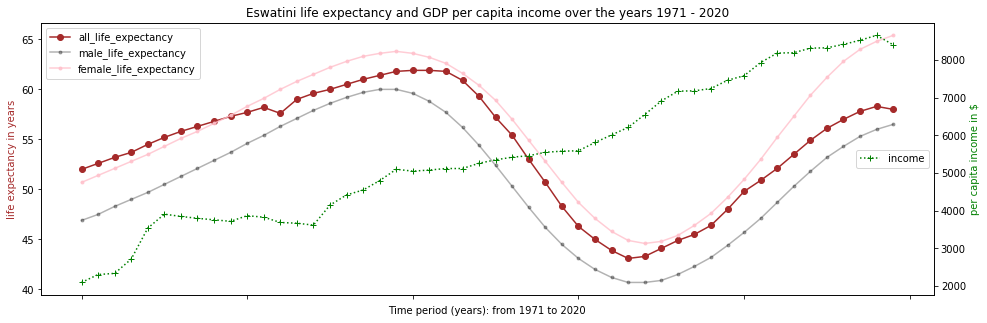

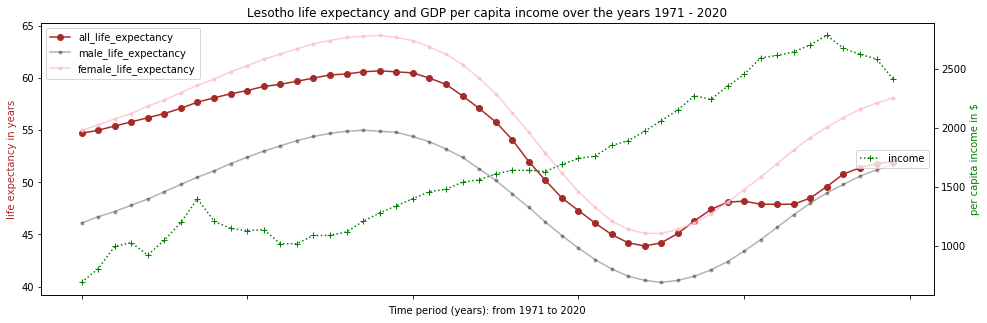

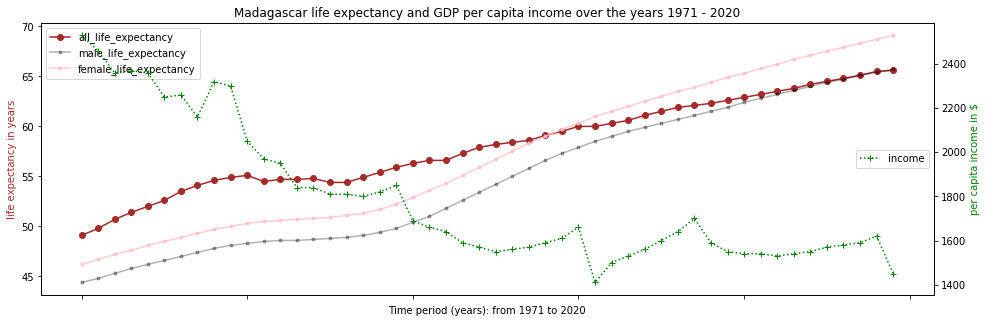

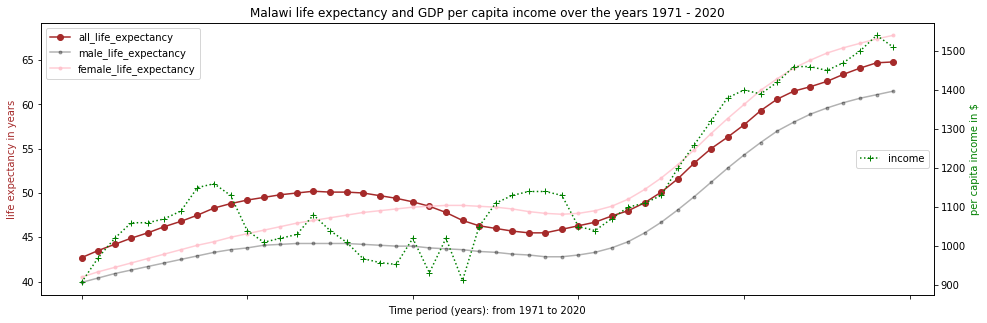

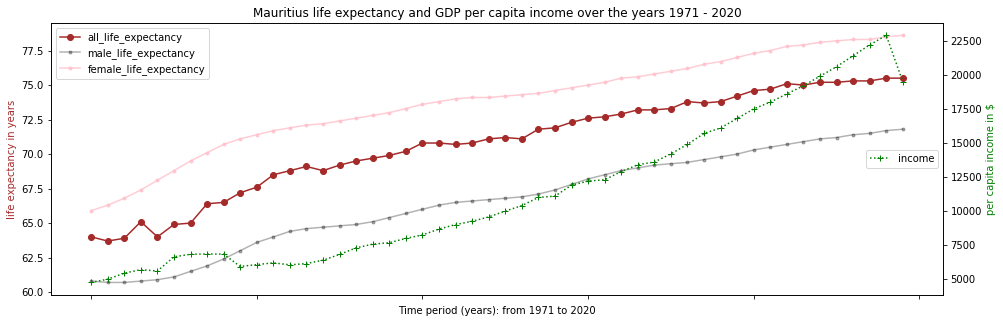

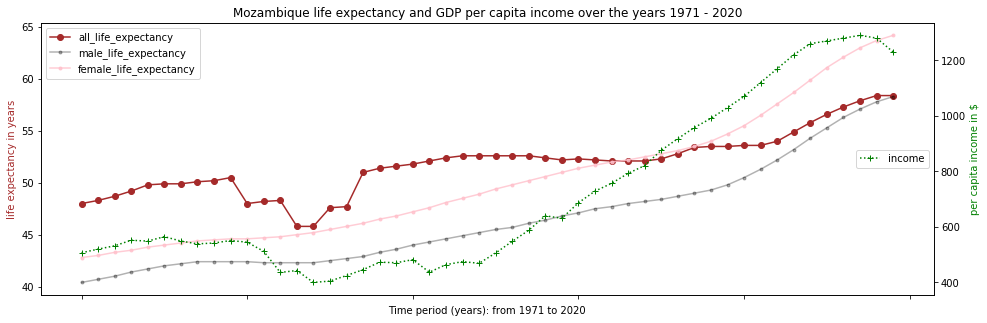

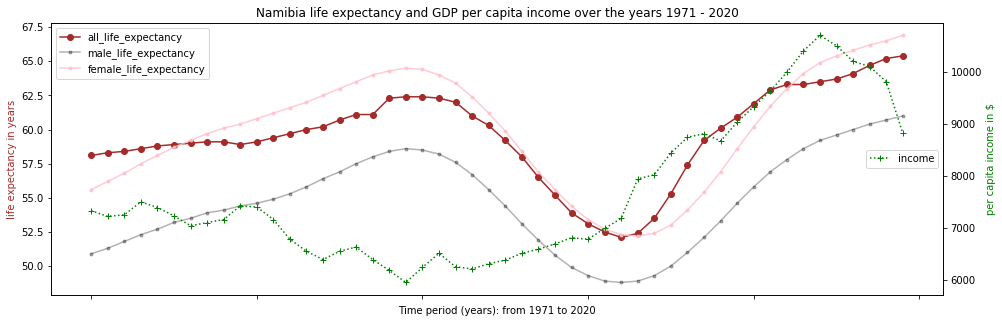

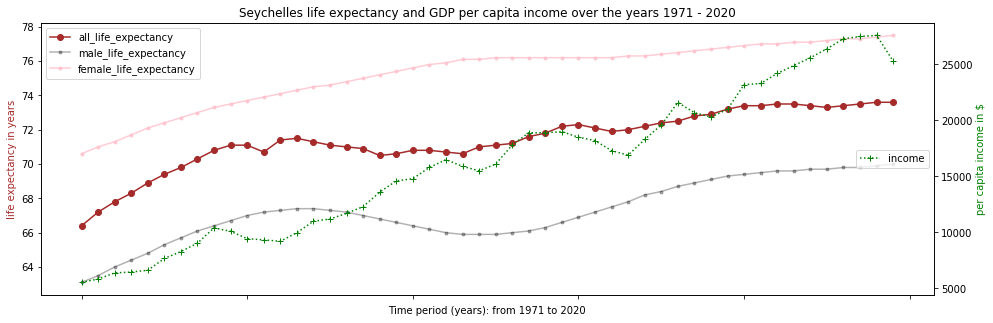

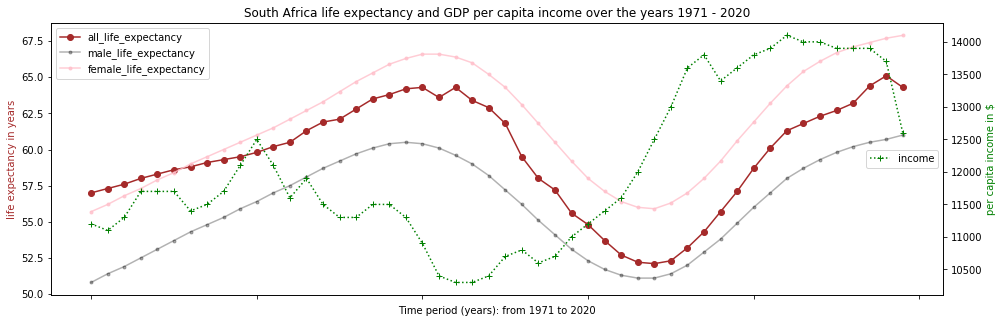

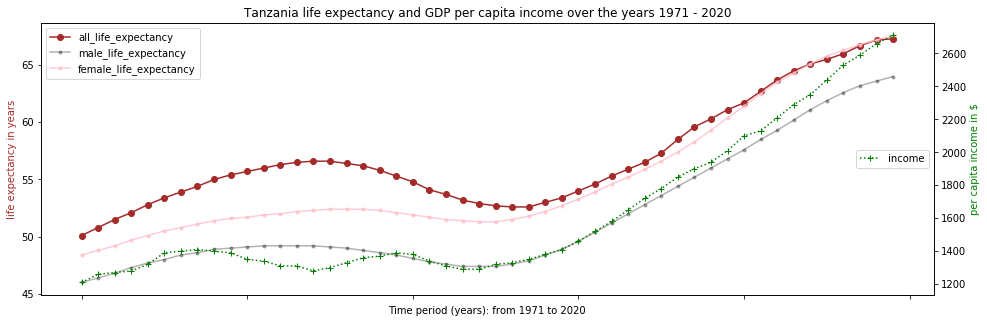

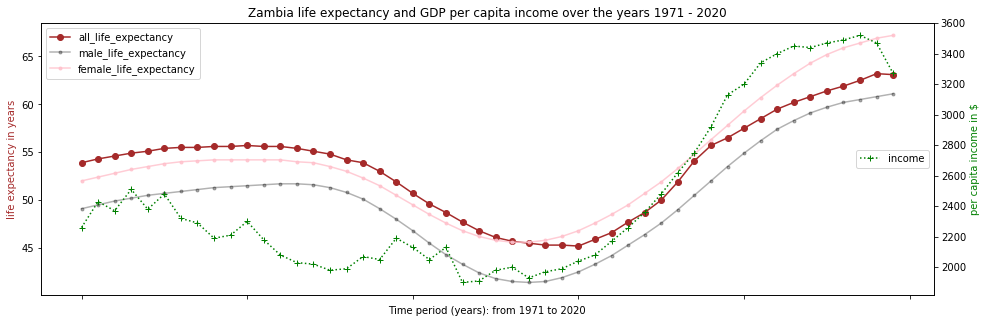

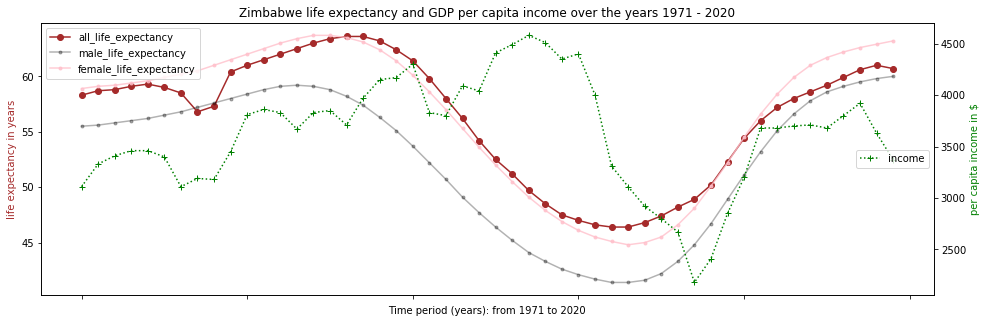

In [65]:
#Call the function to print the visualisation per country
for country in sadc_countries:
    view_country(country)

Looking at the visualisations country by country brings interesting insights into how the individual countries contrinuted to the average trend for SADC in question 1. It is worth noting that although the country by country trend analysis roughly shows the same trend as the average in most cases, there are some countries that exhibit the trend more severely than others, whereas other countries seem to be less impacted. There are also some countries that seem to be trending against the average trend in some indicators or for certain periods during the period under review. A few of these observations are noted below.

- The dip in life expectancy indicators between observed during the years 1991 and early 2000's is more pronounced in countries like Botswana, Zimbabwe, Eswatini, South Africa, and Lesotho; while countries like Seychelles, Comoros, Mauritius, and Mozambique seem to be barely showing this dip.
- The per capita income for countries like the Congo Democratic Republic and Madagascar show a falling trend over the entire period. Zimbabwe on the other hand had a sharp dip between 2000 and 2008 and then showed signs of recovery before plateauing in the early years of the decade starting 2011. South Africa on the other hand had it's dip during the decade starting 1981 into the early 1990s before showing sustained growth until a sharp decline in the years 2019/2020. 

#### Question 3: Is the trend where female life expectancy is higher than the male life expectancy consistent for ALL 16 SADC countries for each of the years under review (1971 to 2020)?

From the visualisations in the first two questions it seems the female life expectancy indicator figures are generally higher than the male life expectancy figures. This questions investigates if this trend is indeed sustained for every country and every year under review.

The approach to this question is to melt the dataframes so that the years appear as row values under the 'year' column for each year for each country. The male life expectancy figure for each data point is then subtracted from the equivalent female life expectancy figure and where the difference is a positive number (confirming that the female life expectancy is higher), the difference cell is populated with a green bar. Where this is false the bar color will be red

In [66]:
#Melt the dataframes to have the Year columns run as values in the 'year' column
income_df_melt = pd.melt(income_df, id_vars='country', var_name='year', value_name='income_per_capita')
life_expectancy_all_df_melt = pd.melt(life_expectancy_all_df, id_vars='country', var_name='year', value_name='all_life_expectancy')
life_expectancy_male_df_melt = pd.melt(life_expectancy_male_df, id_vars='country', var_name='year', value_name='male_life_expectancy')
life_expectancy_female_df_melt = pd.melt(life_expectancy_female_df, id_vars='country', var_name='year', value_name='female_life_expectancy')


In [67]:
#Merge all four dataframes with the unique combination of country and year as the index
df_merge_1 = income_df_melt.merge(life_expectancy_all_df_melt, how='inner',on=['country', 'year'])
df_merge_2 = df_merge_1.merge(life_expectancy_male_df_melt, how='inner',on=['country', 'year'])
df_merge_3 = df_merge_2.merge(life_expectancy_female_df_melt, how='inner',on=['country', 'year'])
df_combined = df_merge_3.reset_index(drop=True).set_index(['country', 'year'])


In [68]:
#Add a column that calculates the difference between the Female life expectancy and the male life expectancy...
#...for each index (i.e. unique pairing of country and year)
#Where Female life expectancy is greater than Male life expectancy show a green bar, and a red bar where Male life expectancy is higher
#SPOILER ALERT: All bars are Green which means females generally lived longer in the SADC countries for the period under review

df_combined['diff_female_male_life_expectancy'] = (df_combined['female_life_expectancy'] - df_combined['male_life_expectancy'])
df_combined = df_combined.style.bar(subset=['diff_female_male_life_expectancy'], align='mid', color=['#d65f5f', '#5fba7d'])

In [69]:
df_combined

The above visualisation confirms that for the period under review, and for every country and every year, the female life expectancy is higher than the male life expectancy.

#### Question 4: How do the figures for the GDP per capita income and the life expectancies for each of the countries compare to the average figures for the SADC region over the review period?

For this last question, I take a deep dive into each of the indicators. I do this by plotting on a single visualisation, the values for each of the SADC countries across the years 1971 to 2020 for the specific indicator. I also include the line for the average SADC figure for the indicator so that it is instantly clear how each country is performing against the SADC average for each indicator for each year.

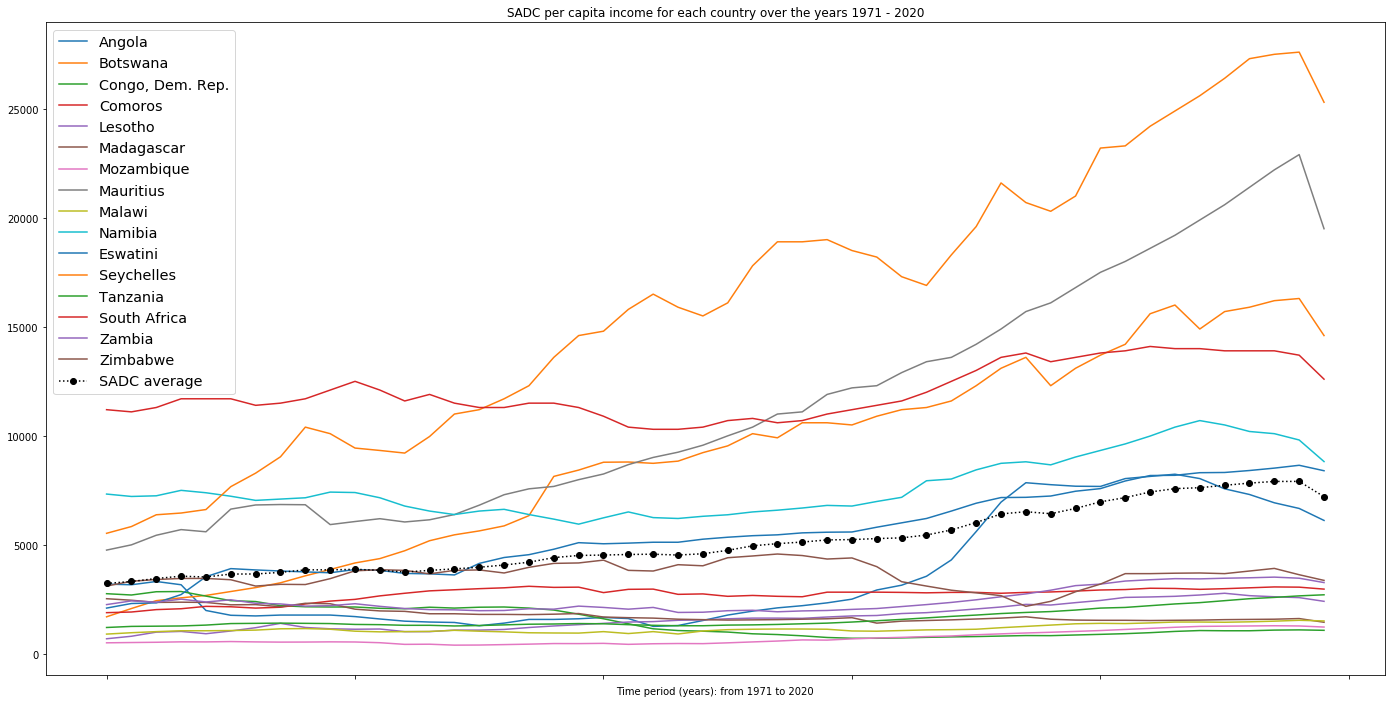

In [70]:
#Plotting the per capita income for each SADC country and the average across the years 1971 to 2020
fig,ax = plt.subplots(figsize=(24,12));
income_df.set_index('country').T.plot(ax=ax);
income_df.mean(axis=0).plot(ax=ax, color='black', label='SADC average', marker = 'o', linestyle="dotted");
ax.legend(loc='upper left',fontsize='x-large');
plt.title('SADC per capita income for each country over the years 1971 - 2020');
ax.set_xlabel('Time period (years): from 1971 to 2020');

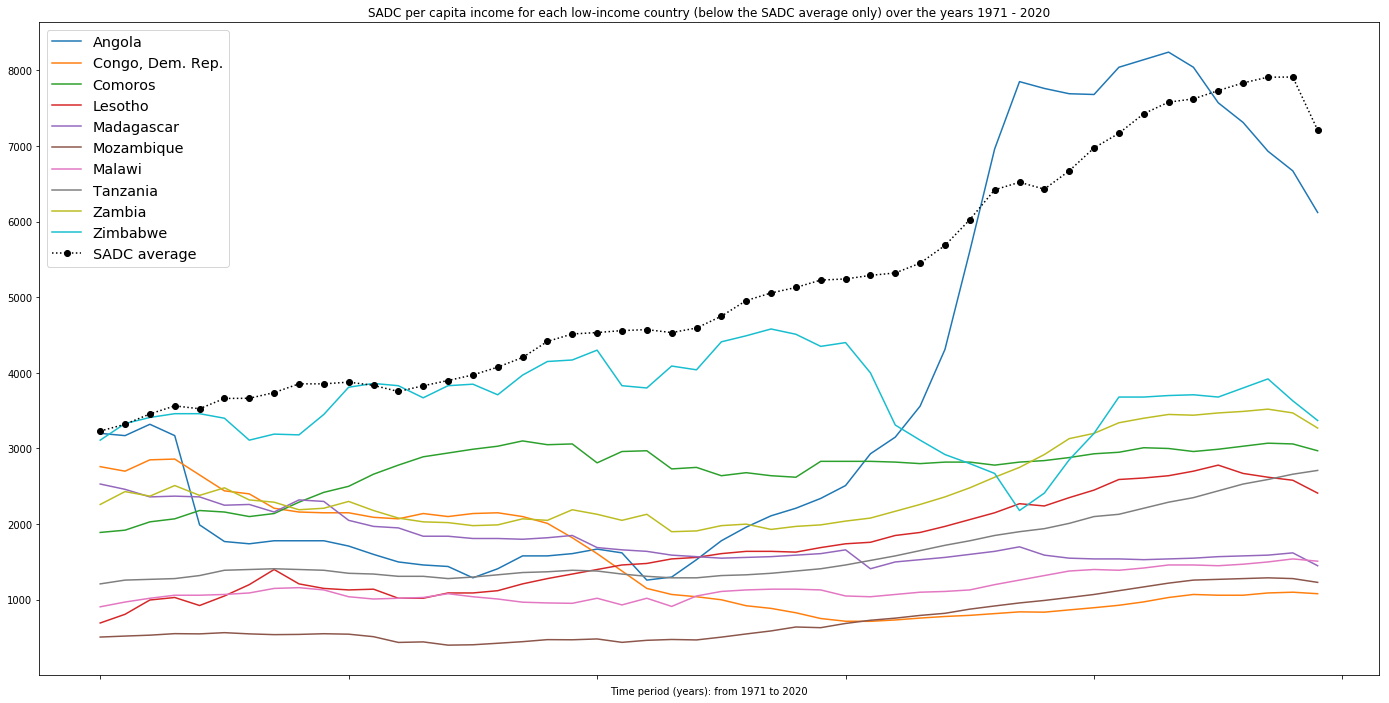

In [71]:
#Plotting the per capita income for each SADC country and the average across the years 1971 to 2020
#This version shows only the countries that are tracking below the average line
fig,ax = plt.subplots(figsize=(24,12));
income_df.set_index('country').drop(['Seychelles', 'Mauritius', 'Botswana', 'South Africa', 'Namibia', 'Eswatini']).T.plot(ax=ax);
income_df.mean(axis=0).plot(ax=ax, color='black', label='SADC average', marker = 'o', linestyle="dotted");
ax.legend(loc='upper left',fontsize='x-large');
plt.title('SADC per capita income for each low-income country (below the SADC average only) over the years 1971 - 2020');
ax.set_xlabel('Time period (years): from 1971 to 2020');

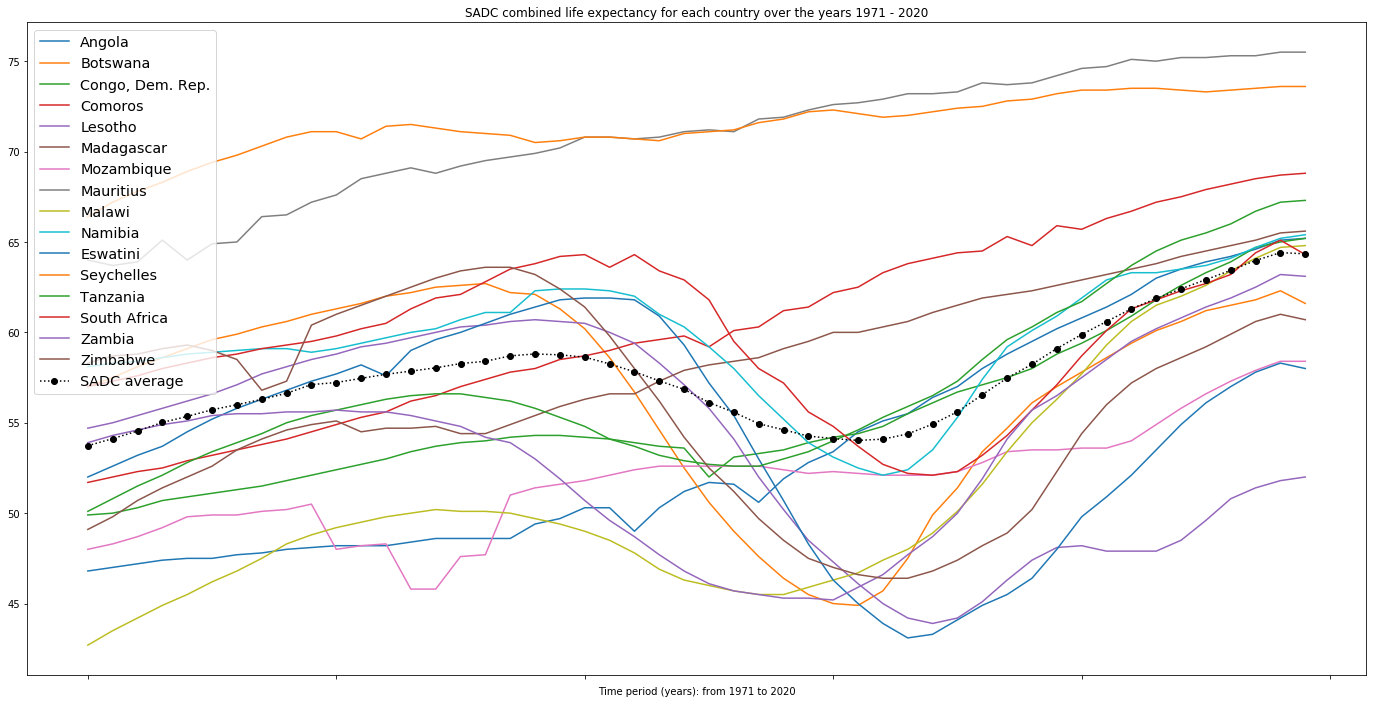

In [72]:
#Plotting the combined life expectancy for each SADC country and the average across the years 1971 to 2020
fig,ax = plt.subplots(figsize=(24,12));
life_expectancy_all_df.set_index('country').T.plot(ax=ax);
life_expectancy_all_df.mean(axis=0).plot(ax=ax, color='black', label='SADC average', marker = 'o', linestyle="dotted");
ax.legend(loc='upper left',fontsize='x-large');
plt.title('SADC combined life expectancy for each country over the years 1971 - 2020');
ax.set_xlabel('Time period (years): from 1971 to 2020');

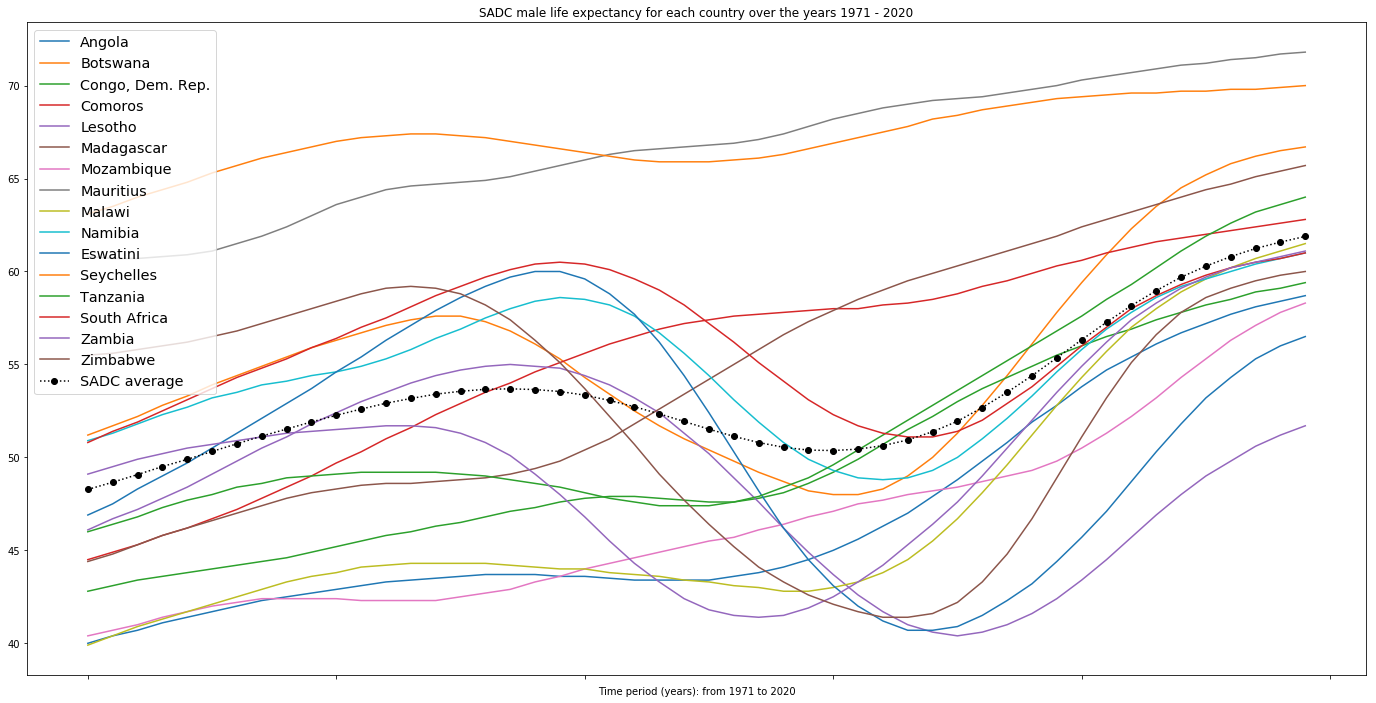

In [73]:
#Plotting the male life expectancy for each SADC country and the average across the years 1971 to 2020
fig,ax = plt.subplots(figsize=(24,12));
life_expectancy_male_df.set_index('country').T.plot(ax=ax);
life_expectancy_male_df.mean(axis=0).plot(ax=ax, color='black', label='SADC average', marker = 'o', linestyle="dotted");
ax.legend(loc='upper left',fontsize='x-large');
plt.title('SADC male life expectancy for each country over the years 1971 - 2020');
ax.set_xlabel('Time period (years): from 1971 to 2020');

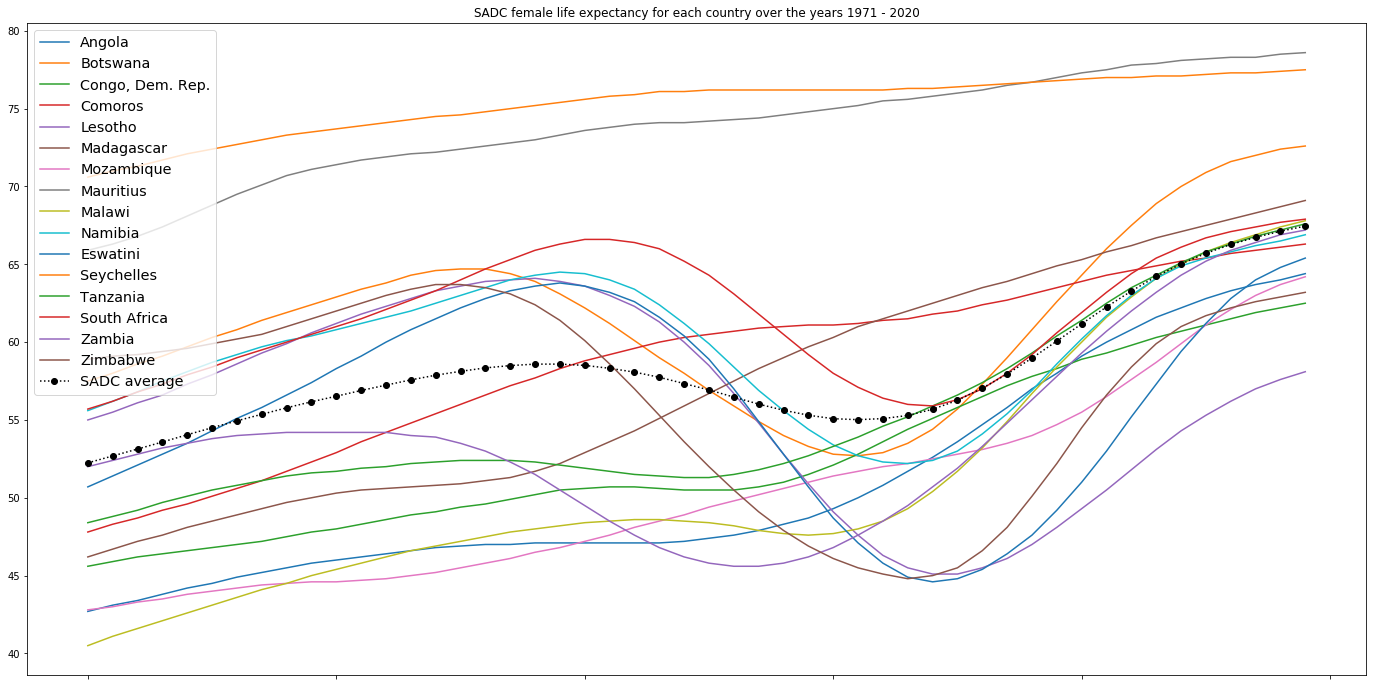

In [74]:
#Plotting the female life expectancy for each SADC country and the average across the years 1971 to 2020
fig,ax = plt.subplots(figsize=(24,12));
life_expectancy_female_df.set_index('country').T.plot(ax=ax);
life_expectancy_female_df.mean(axis=0).plot(ax=ax, color='black', label='SADC average', marker = 'o', linestyle="dotted");
plt.title('SADC female life expectancy for each country over the years 1971 - 2020');
ax.legend(loc='upper left',fontsize='x-large');


## Conclusions

The report on this project can be found on: https://medium.com/@caviebepura/5-decades-of-promise-for-southern-africa-9bfb7dadedf1

Generally, the data does seem to indicate that the SADC countries have generally been on a rising trend with both the per capita income growth and life expectancy. Another conclusion that the data seems to support is that life expectancy and income seem to rise in tandem.

However, there are a few exceptions to these generalizations. Firstly, Madagascar and the Congo, Democratic Republic seem to have falling per capita incomes for the period under review. Zimbabwe is another country that has had sustained periods of decline on this indicator as well, although there is a period of resurgence post-2008 before stalling again around 2012. It will be interesting to dig deeper into these case studies and see what could have caused this.

The dips in the SADC average on the per capita indicator are curiously coinciding with the global financial crisis of 2008 and the global COVID-19 pandemic of 2019/2020. Again, additional data and analysis into this observation may lead to interesting results.

On the life expectancy trend, I was drawn to sustained decline in the life expectancy during the period 1991 to 2000. UNAIDS statistics indicate that this is the period that HIV & AIDS deaths were most prevalent in Sub-Saharan Africa. I would be interested in pursuing future studies into how this may explain this trend in life expectancy.

In conclusion, I believe this project opens up the options of what can be achieved when various indicators are tracked and compared to each other to see if there are any interesting observations. These observations may then lead to more detailed and scientific studies into how certain phenomenon can be explained with data and trends. This information can play a major role in informing governance, policy setting and focus of funding.

## Limitations
A few things that I feel may limit the effectiveness in generalizing the observations and conclusions from this project is that the data did not take into account the relative sizes of the populations of each of the SADC countries. An indicator may have different significance when used on a population of a few million people as opposed to tens of millions. Having this context on the population size may add value to the analyis.

Another limitation is that the data gives cross-cutting averages across the entire population which may imply that income, for example, is evenly distributed. This may artificially raise the average income for a country where income is unevenly distributed with only a few earning disproportionately high income.

### Acknowledgements

For the data: https://www.gapminder.org/data/

For the funding of this program: https://www.alx-t.com/

#### Additional sources
https://www.sadc.int/member-states#:~:text=The%20Southern%20African%20Development%20Community,Republic%20Tanzania%2C%20Zambia%20and%20Zimbabwe.

https://www.unaids.org/en/resources/fact-sheet#:~:text=AIDS%2Drelated%20deaths&text=In%202021%2C%20around%20650%20000,1.8%20million%5D%20people%20in%202010.



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255